In [1]:
from sklearn.datasets import fetch_lfw_people

# 加载数据集
faces = fetch_lfw_people(min_faces_per_person=60)
faces.target_names, faces.images.shape

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
        'Tony Blair'], dtype='<U17'),
 (1348, 62, 47))

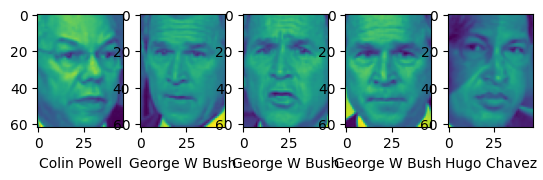

In [10]:
"""
挑战：预览数据集前 5 张人像图片，以 1 行 5 列子图呈现。

规定：每张图片横轴上显示该张图片对应人像姓名。
"""

from matplotlib import pyplot as plt

%matplotlib inline

## 代码开始 ### (≈4 行代码)

# 我写的
for i in range(5):
    img = faces.images[i]
    name = faces.target_names[faces.target[i]]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel(name)
    # plt.axis("off")

# # 参考答案
# fig, axes = plt.subplots(1, 5, figsize=(12, 6))
# for i, image in enumerate(faces.images[:5]):
#     axes[i].imshow(image)
#     axes[i].set_xlabel(faces.target_names[faces.target[i]])


## 代码结束 ###

下面我们使用 faces.data 数据，其已经将每一个人像对于的二维数组展平成 1 维。

faces.data 的形状为 (1348,2914) ，即代表有 1348 个样本，每一个样本对应了 2914 个特征。而这 2914 个特征即是将人像图片 62 * 47 = 2914展平之后的向量。

接下来，按照惯例需要对数据集进行切分，将其分为训练集和测试集。不过，这里值的注意的是，由于样本只有 1348 个，而每个样本对应的特征则为 2914。机器学习建模过程中，我们要避免特征远大于样本数量的情形，这样训练出来的模型一般表现都会非常糟糕。

所以，这里我们需要对数据特征进行「降维」，实际上就是减少数据的特征量。这里使用到 PCA 降维方法。

In [11]:
from sklearn.decomposition import PCA

# 直接运行，将数据特征缩减为 150 个
pca = PCA(n_components=150, whiten=True, random_state=42)
pca_data = pca.fit_transform(faces.data)
pca_data.shape

(1348, 150)

In [13]:
"""
挑战：使用 train_test_split() 将数据集切分为 80%（训练集） 和 20%（测试集） 两部分。

规定：训练集特征，测试集特征，训练集目标，测试集目标分别为：X_train, X_test, y_train, y_test，随机数种子定为 42。
"""
from sklearn.model_selection import train_test_split

## 代码开始 ### (≈1 行代码)
X_train,X_test,y_train,y_test = train_test_split(pca_data,faces.target,test_size=0.2,random_state=42)
## 代码结束 ###

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1078, 150), (270, 150), (1078,), (270,))

In [16]:
"""
挑战：使用 scikit-learn 提供的支持向量机分类方法完成建模，并得到模型在测试集上的准确度结果。

规定：支持向量机分类器参数 C=10, gamma=0.001，其余为默认参数。
"""

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(C = 10,gamma=0.001,kernel='rbf')
svc.fit(X_train,y_train)
svc.decision_function

y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_pred=y_pred,y_true=y_test)
accuracy

0.8296296296296296

: 